In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 경사 하강법

In [2]:
np.random.seed(0)

In [4]:
# y = 4X + 6을 근사(w1=4, w0=6) & 임의의 노이즈 생성
X = 2 * np.random.rand(100, 1)
# w0 + w1*X + noise(1~100 사이의 정규분포를 따르는 값)
y = (6) + (4 * X) + (np.random.randn(100, 1))

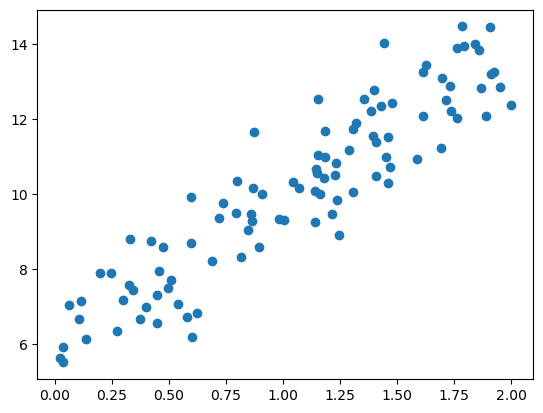

In [6]:
plt.scatter(X, y)
plt.show()

In [28]:
# Loss (Cost) 계산 함수
def get_cost(y, y_pred):
    N = len(y)
    # loss -> (1/N) * sum of (실제값 - 예측값)**2
    cost = np.sum(np.square(y - y_pred))/N

    return cost

In [24]:
# 경사하강법 구현 함수 - 파라미터 업데이트
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    # 이후 코드에서 for문 사용하므로, 이전 계산의 w1_update, w0_update 값을 각각 0으로 다시 초기화 하기 위함
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산 및 실제값과의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot행렬 연산으로 구하기 위해 모든값이 1인 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1_update, w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [20]:
# 경사하강법 구현 함수 - 경사하강법 반복
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1 0으로 초기화
    w1 = np.zeros((1,1))
    w0 = np.zeros((1,1))

    # iters 만큼 get_weight_updates() 반복 수행해 w1, w0 업데이트
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y) # learning_rate = 0.01이 기본값으로 고정
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [31]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f'w1: {w1[0,0]:.3f}, w0: {w0[0,0]:.3f}')

w1: 3.985, w0: 5.910


In [36]:
y_pred = w1 * X + w0
print(f'Gradient Descent Total Cost: {get_cost(y, y_pred):.4f}')

Gradient Descent Total Cost: 0.8598


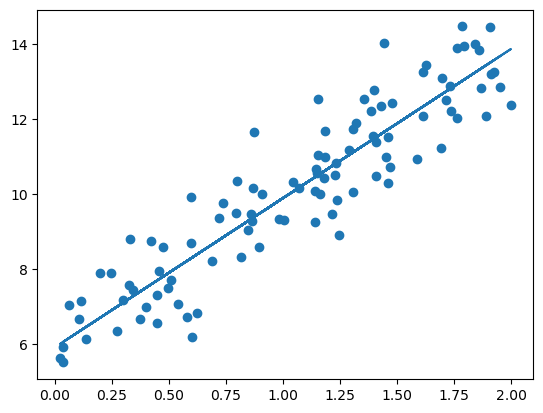

In [37]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

In [47]:
# 미내배치 경사하강법 구현
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w1 = np.zeros((1, 1))
    w0 = np.zeros((1, 1))

    for ind in range(iters):
        np.random.seed(ind)

        # 전체 X, y 데이터에서 램덤하게 batch_size만큼 데이터 추출
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [48]:
w1, w0 = stochastic_gradient_descent_steps(X, y)
print(f'w1: {w1[0,0]:.3f}, w0: {w0[0,0]:.3f}')

w1: 3.937, w0: 5.889


In [49]:
y_pred = w1 * X + w0
print(f'Gradient Descent Total Cost: {get_cost(y, y_pred):.4f}')

Gradient Descent Total Cost: 0.8651


# LinearRegression을 이용한 보스턴 주택 가격 회귀 구현

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# 'RAD', 'CHAS' 수치형으로 변환
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce')
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce')

In [56]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [57]:
bostonDF['PRICE'] = boston.target

bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [58]:
bostonDF.shape 

(506, 14)

## 각 Feature의 회귀 결과에 미치는 영향 시각화

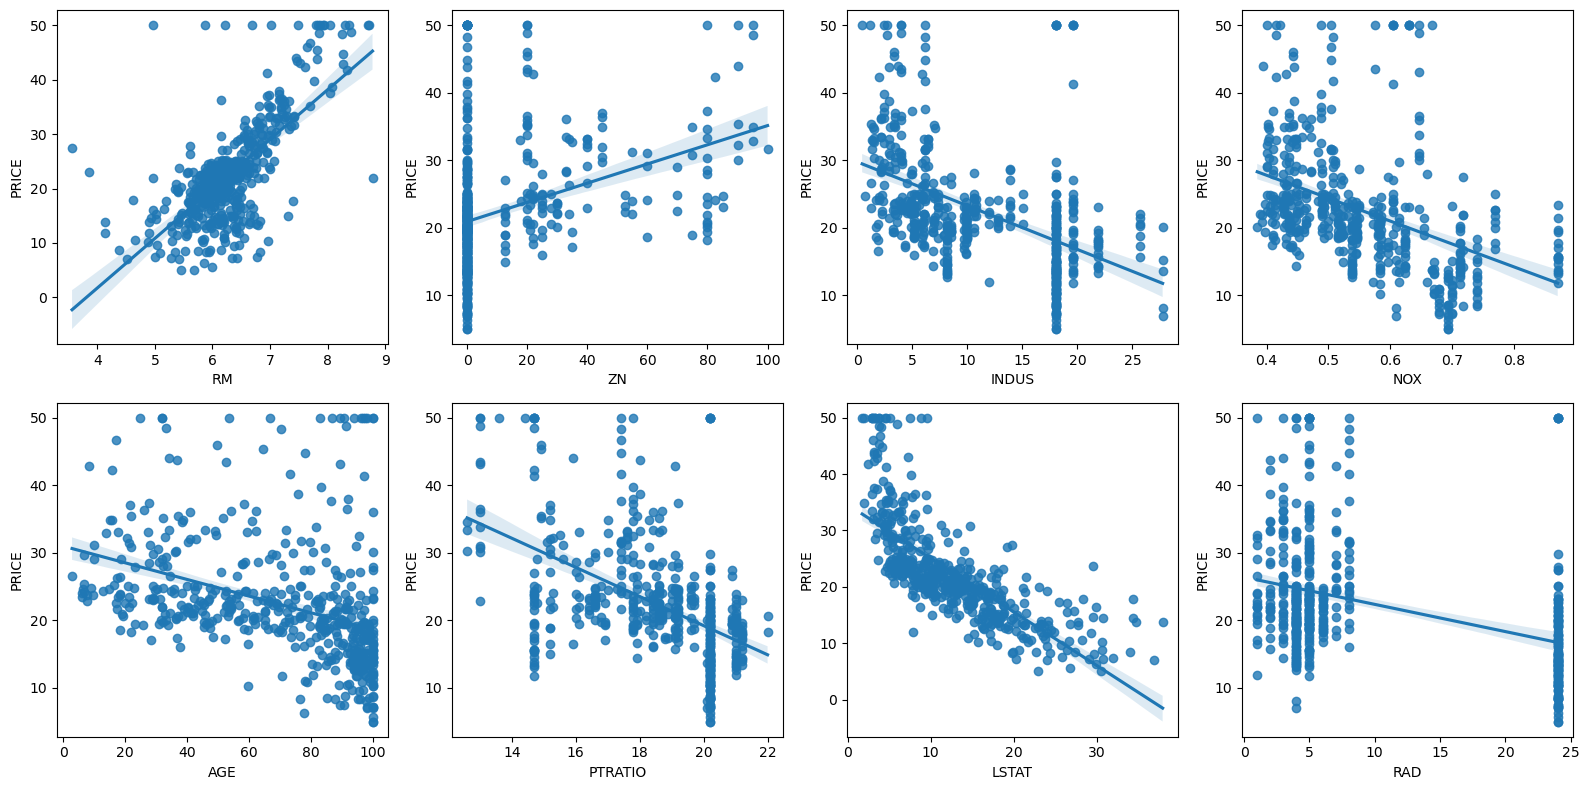

In [61]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4) # (0~3 = 0, 4~7 = 1)
    col = i % 4 # (0, 1, 2, 3)
    # seaborn ragplot 이용. 산점도와 직선 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

plt.tight_layout()
plt.show()

- RM과 LSTAT의 선형관계가 뚜렸하게 보임.

## scikit-learn LinearRegression 클래스 활용 보스턴 주택가격 회귀모델 만들기

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=42)

# 선형 회귀 OLS로 학습/예측/평가 수행
# 1. 학습
lr = LinearRegression()
lr.fit(X_train, y_train)
# 2. 예측
y_pred = lr.predict(X_test)
# 3. 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score: {r2_score(y_test, y_pred):.3f}')

MSE: 21.517, RMSE: 4.639
Variance score: 0.711


In [71]:
print(f'절편 값: {lr.intercept_}')
print(f'회귀 계수 값: {np.round(lr.coef_, 1)}')

절편 값: 31.631084035693046
회귀 계수 값: [ -0.1   0.    0.    3.1 -15.4   4.1  -0.   -1.4   0.2  -0.   -0.9   0.
  -0.5]


In [73]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          4.1
CHAS        3.1
RAD         0.2
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -15.4
dtype: float64

## k-fold 교차검증

In [103]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1)

lr = LinearRegression()

# cross-val_score()로 5-fold CV 수행 (MSE)
mse_scores = -1 * cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(mse_scores)
mean_rmse = np.mean(rmse_scores)

print(f'개별 fold의 MSE scores: {np.round(mse_scores, 2)}')
print(f'개별 fold의 RMSE scores: {np.round(rmse_scores, 2)}')
print(f'5 folds 의 평균 RMSE score: {np.round(mean_rmse, 2)}')

개별 fold의 MSE scores: [12.46 26.05 33.07 80.76 33.31]
개별 fold의 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE scores: 5.83


# 다항회귀와 과대/과소 적합 이해

In [78]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [82]:
X = np.arange(4).reshape(2, 2)
X

array([[0, 1],
       [2, 3]])

In [83]:
poly = PolynomialFeatures(degree=2)
poly_ftr = poly.fit_transform(X)
poly_ftr

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [98]:
def polynomial_func(X):
    # y = 1 + 2X1**2 + 3X1**2 + 4X2**3
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3

    return y

In [99]:
y = polynomial_func(X)
y

array([  5, 125])

In [100]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)

In [101]:
model = LinearRegression()
model.fit(poly_ftr, y)

print(f'Polynomial 회귀계수:', np.round(model.coef_, 2), sep='\n')
print(f'Polynomial 회귀 Shape:', np.round(model.coef_.shape, 2), sep='\n')

Polynomial 회귀계수:
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape:
[10]


In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    # y = 1 + 2X1**2 + 3X1**2 + 4X2**3
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3

    return y

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)), 
    ('lr', LinearRegression()),
])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print(f'회귀 계수:', np.round(model.named_steps['lr'].coef_, 2), sep='\n')

회귀 계수:
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [110]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

#  임의의 값으로 구성된 X의 값에 대해 코사인 변환 값을 반환
def true_cos(X): 
    return np.cos(1.5 * np.pi * X)

# X는 0 ~ 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30 
X = np.sort(np.random.rand(n_samples))

# y값은 true_cos에 약간의 노이즈 변동 값을 더한 값
y = true_cos(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.0432087498723184 입니다.

Degree 15 회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08] 입니다.
Degree 15 MSE 는 182581084.8263125 입니다.


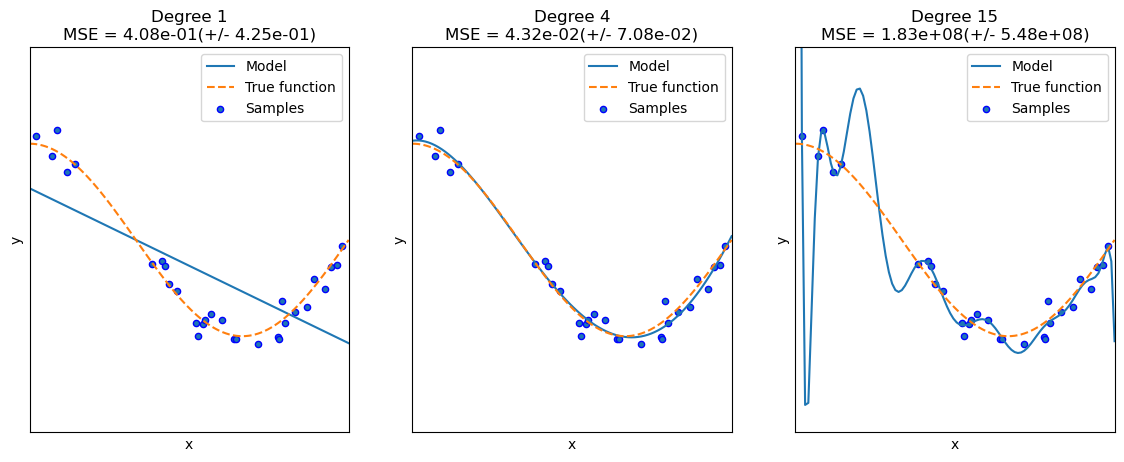

In [112]:
# 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교할 것!!

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=()) # setp() : 선 두께, 색깔 등 좀 더 다양한 조정을 할 수 있음 
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring='neg_mean_squared_error', cv=10)
     # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_ # coef_ : 회귀 계수
    print(f'\nDegree {degrees[i]} 회귀 계수는 {np.round(coefficients, 2)} 입니다.')
    print(f'Degree {degrees[i]} MSE 는 {-1*np.mean(scores)} 입니다.')
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')  # newaxis : numpy array의 차원을 늘려준다
    # 실제 값 곡선
    plt.plot(X_test, true_cos(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc='best')
    plt.title(f'Degree {degrees[i]}\nMSE = {-scores.mean():.2e}(+/- {scores.std():.2e})')

plt.show()

## 릿지 회귀

In [113]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [115]:
# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
mse_scores = -1 * cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(mse_scores)
mean_rmse = np.mean(rmse_scores)

print(f'개별 fold의 MSE scores: {np.round(mse_scores, 3)}')
print(f'개별 fold의 RMSE scores: {np.round(rmse_scores, 3)}')
print(f'5 folds 의 평균 RMSE score: {np.round(mean_rmse, 3)}')

개별 fold의 MSE scores: [11.422 24.294 28.144 74.599 28.517]
개별 fold의 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE scores: 5.518


In [117]:
# alpha 값을 변화 시키면서 달라지는 RMSE 평균값을 반환하는 코드
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score
    mse_scores = -1 * cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    mean_rmse = np.mean(np.sqrt(mse_scores))
    print(f'alpha = {alpha} 일 때 5 folds 의 평균 RMSE : {round(mean_rmse,3)}')

alpha = 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha = 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha = 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha = 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha = 100 일 때 5 folds 의 평균 RMSE : 5.33


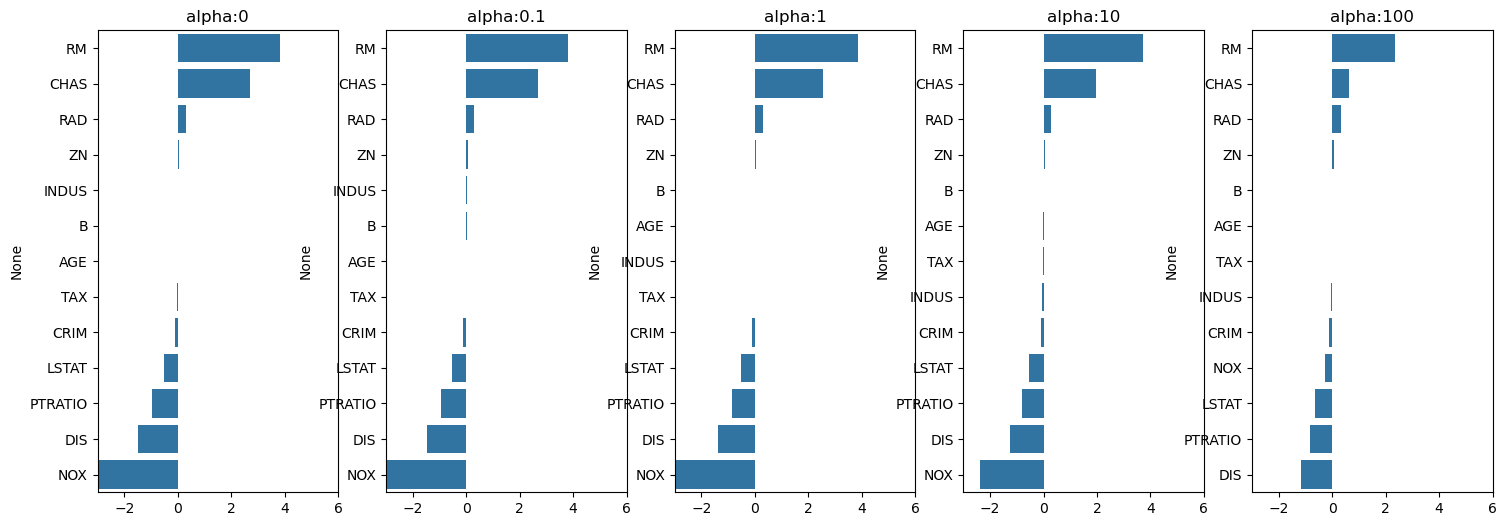

In [118]:
# alpha 값의 변화에 따른 피처의 회귀 계수 값을 시각화

# 각 alpha에 따른 회귀 계수 값을 시각화 
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [119]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha' + str(ridge_alphas[0])
coeff_df.sort_values(by = 'alpha:0', ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- alpha 값이 커질수록 회귀 계수들의 절대값 크기가 작아진다.

## 라쏘 회귀

In [121]:
# alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력

from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7) # l1_ratio를 고정해두었다는 것을 확인!!
        mse_scores = -1 * cross_val_score(model, X_data_n, 
                                             y_target_n, scoring='neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(mse_scores))
        print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE: {avg_rmse:.3f} ')
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [122]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [124]:
sort_column = 'alpha:'+ str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- 회귀계수가 0이 된 feature 존재.

In [126]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n = X_data, y_target_n = y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [127]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 선형 회귀 모델을 위한 데이터 변환

In [130]:
# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
    # Standardication (표준화)
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    # Nomalization (정규화)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    # log-transformation (로그변환)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [135]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]

scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(f'\n## 변환 유형:{scale_method[0]} /// Polynomial Degree:{scale_method[1]} ##')
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None /// Polynomial Degree:None ##
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard /// Polynomial Degree:None ##
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard /// Polynomial Degree:2 ##
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax /// Polynomial Degree:None ##
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax /// Polynomial Degree:2 ##
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log /// Polyno

# 로지스틱 회귀

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [140]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print(f'accuracy: {accuracy_score(y_test, lr_preds):0.3f}')
print(f'roc_auc: {roc_auc_score(y_test , lr_preds):0.3f}')

accuracy: 0.977
roc_auc: 0.972


In [147]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 logisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

    print(f'solver: {solver}, accuracy: {accuracy_score(y_test, lr_preds)}, roc_auc: {roc_auc_score(y_test, lr_preds_proba)}')

solver: lbfgs, accuracy: 0.9766081871345029, roc_auc: 0.9947089947089947
solver: liblinear, accuracy: 0.9824561403508771, roc_auc: 0.9947089947089947
solver: newton-cg, accuracy: 0.9766081871345029, roc_auc: 0.9947089947089947
solver: sag, accuracy: 0.9824561403508771, roc_auc: 0.9947089947089947
solver: saga, accuracy: 0.9824561403508771, roc_auc: 0.9947089947089947


In [145]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2'], # penalty가 오직 l2와 none만 가질 수 있다.
        'C':[0.01, 0.1, 1, 1, 5, 10]} 

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터: {grid_clf.best_params_}', f'최적 평균 정확도: {grid_clf.best_score_:.3f}', sep='\n')

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}
최적 평균 정확도: 0.975


# 회귀 트리

In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 보스턴 데이터 세트 로드
boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# 'RAD', 'CHAS' 수치형으로 변환
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce')
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce')

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
mse_scores = -1 * cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores  = np.sqrt(mse_scores)
mean_rmse = np.mean(rmse_scores)

print(f'개별 fold의 MSE scores: {np.round(mse_scores, 2)}')
print(f'개별 fold의 RMSE scores: {np.round(rmse_scores, 2)}')
print(f'5 folds 의 평균 RMSE score: {np.round(mean_rmse, 3)}')

개별 fold의 MSE scores: [ 7.88 13.14 20.57 46.23 18.88]
개별 fold의 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 folds 의 평균 RMSE scores: 4.423


In [162]:
# 입력 모델과 데이터 세트를 입력 받아 교차 검증으로 평균 RMSE를 계싼해주는 함수

def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    mean_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(f'5 folds 의 평균 RMSE score: {np.round(mean_rmse, 3)}')

In [163]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
5 folds 의 평균 RMSE score: 5.978
#####  RandomForestRegressor  #####
5 folds 의 평균 RMSE score: 4.423
#####  GradientBoostingRegressor  #####
5 folds 의 평균 RMSE score: 4.269
#####  XGBRegressor  #####
5 folds 의 평균 RMSE score: 4.959
#####  LGBMRegressor  #####
5 folds 의 평균 RMSE score: 4.646


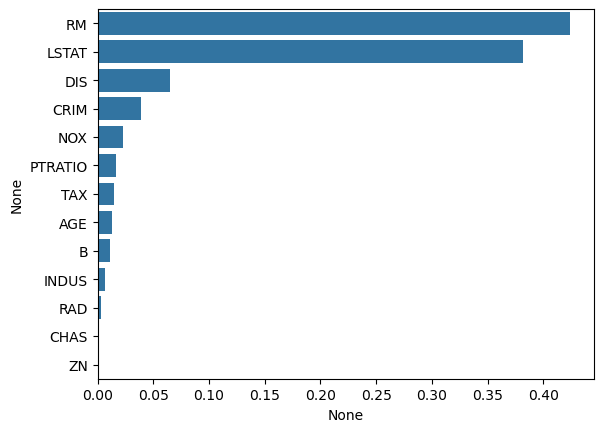

In [167]:
# Regressor 클래스는 선형 회귀와는 다른 처리 방식이기 때문에 회귀 계수를 제공하는 coef_ 속성이 없다. 대신 피처 중요도를 확인 가능
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns ) # linearRegression의 경우에는 모델.coef_를 사용!
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)
plt.show()

(100, 2)


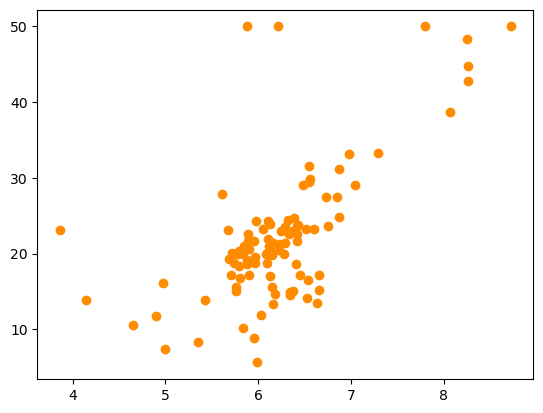

In [168]:
# 2차원 평면상에서 회귀 예측선을 쉽게 표현하기 위해 1개의 변수만 추출
import matplotlib.pyplot as plt


bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")
plt.show()

In [169]:
# LinearRegression, DecisionTreeRegressor
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

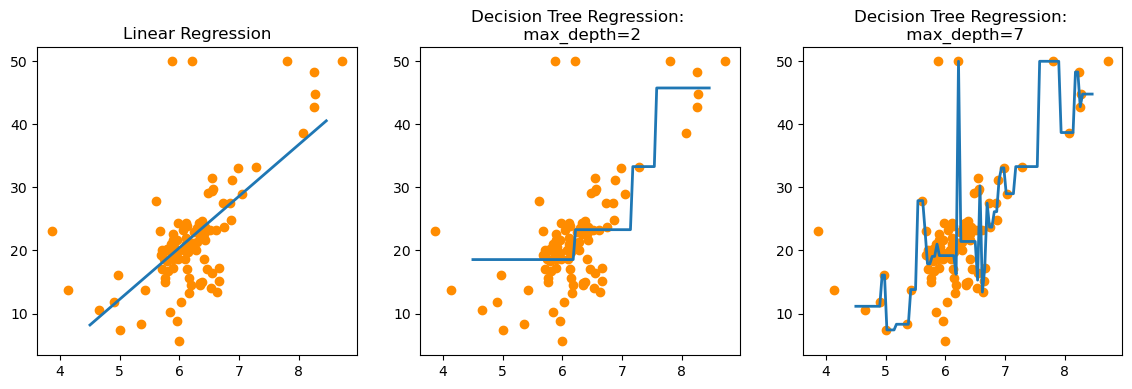

In [170]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

plt.show()